In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# neural network layer
class layer:
    
    # initialization (weights and biases)
    def __init__(self,n_inputs, n_neurons): # self represents the instance of the class
        self.weights = 0.1*np.random.randn(n_inputs,n_neurons) # small random numbers
        self.biases = np.zeros((1,n_neurons))# zeros
        
    # forward pass: pass the data through the layer
    def forward(self, inputs):
        # we need to store the output
        self.output = inputs.dot(self.weights) + self.biases
        
        # remember input values
        self.inputs = inputs
        
    def backward(self, dinputs):
        
        # gradient
        self.dinputs = dinputs.dot(self.weights.T)
        
        # gradients on parameters
        self.dweights = self.inputs.T.dot(dinputs)
        self.dbiases = np.sum(dinputs, axis=0, keepdims=True)
        

        
# activation function
class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
        # remember input values
        self.inputs = inputs
        
    def backward(self, dinputs):

        # copy dvalues
        self.dinputs = dinputs.copy()
        
        # zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
        
        
# linear activation function: outputs = inputs
class linear:

    def forward(self, inputs):
        # flatten the output
        self.inputs = inputs
        self.output = inputs.flatten()

    def backward(self, dinputs):
        # derivative of x is 1 
        self.dinputs = dinputs.copy().reshape(-1,1) # reshape the result as a column vector

        
# mean squeared error        
class loss_mse():

    def forward(self, y_pred, y_true):

    # calculate loss
        sample_losses = (y_true - y_pred)**2
        # return losses
        return sample_losses

    def backward(self, y_pred, y_true):

        # number of data points
        samples = len(y_pred)

        # gradient 
        self.dinputs = -2 * (y_true - y_pred) 

        # normalize gradient
        self.dinputs = self.dinputs / samples

        
class optimizer_GD:

    def __init__(self, learning_rate=1):
        self.learning_rate = learning_rate
        
    def update_parameters(self, layer):
        
        # apply gradient descent iteration
        layer.weights = layer.weights - self.learning_rate*layer.dweights
        layer.biases = layer.biases - self.learning_rate*layer.dbiases

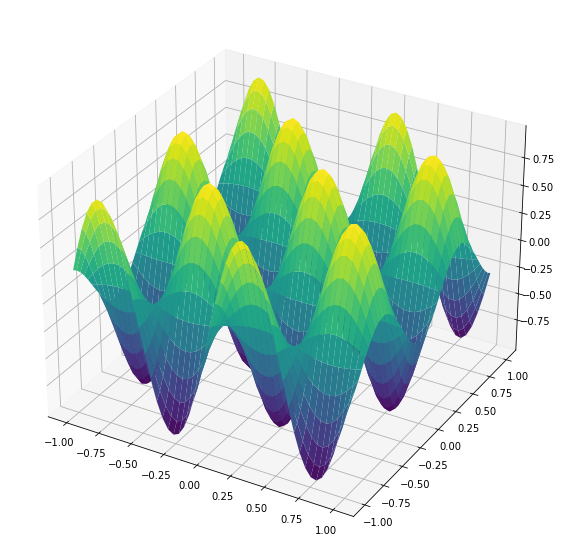

In [3]:
m = 50
x1 = np.linspace(-1,1,m)
x2 = np.linspace(-1,1,m)
X1,X2 = np.meshgrid(x1,x2)
Y = np.sin(6*X1)*np.cos(6*X2)  # f(x,y) = sin(6x)cos(6x)

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [4]:
# reshape data
X = np.c_[X1.reshape(-1,1),X2.reshape(-1,1)]
y = Y.reshape(-1)
X.shape, y.shape

((2500, 2), (2500,))

In [5]:
'neural network initialization'

# layer 1
layer1 = layer(n_inputs = 2, n_neurons = 64)
activation1 = ReLU()

# layer 2
layer2 = layer(n_inputs = 64, n_neurons = 64)
activation2 = ReLU() 

# layer 3 
layer3 = layer(n_inputs = 64, n_neurons = 1)
activation3  = linear()

# loss function = mean squared error
loss_function = loss_mse()

# optimizer
optimizer = optimizer_GD(learning_rate = 0.5)

In [11]:
n_epochs = 2000
error = np.zeros(n_epochs)
y_pred = np.zeros(y.shape)

# gradient descent iterations
for epoch in range(n_epochs):

    # forward pass
    layer1.forward(X)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    layer3.forward(activation2.output)
    activation3.forward(layer3.output)

    # loss (mean squared error)
    losses = loss_function.forward(activation3.output,y)


    # backward pass
    loss_function.backward(activation3.output,y)
    activation3.backward(loss_function.dinputs)
    layer3.backward(activation3.dinputs)
    activation2.backward(layer3.dinputs)
    layer2.backward(activation2.dinputs)
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)
    
    
    # update weights and biases
    optimizer.update_parameters(layer1)
    optimizer.update_parameters(layer2)
    optimizer.update_parameters(layer3)


    
    # print loss (every 50 epochs)
    
    if epoch % 100 == 0:
        print('epoch: '+str(epoch))
        print('loss: '+str(np.round(np.mean(losses),3)))
        print('------------------------')

epoch: 0
loss: 0.111
------------------------
epoch: 100
loss: 0.1
------------------------
epoch: 200
loss: 0.091
------------------------
epoch: 300
loss: 0.084
------------------------
epoch: 400
loss: 0.077
------------------------
epoch: 500
loss: 0.071
------------------------
epoch: 600
loss: 0.067
------------------------
epoch: 700
loss: 0.063
------------------------
epoch: 800
loss: 0.059
------------------------
epoch: 900
loss: 0.054
------------------------
epoch: 1000
loss: 0.052
------------------------
epoch: 1100
loss: 0.049
------------------------
epoch: 1200
loss: 0.047
------------------------
epoch: 1300
loss: 0.044
------------------------
epoch: 1400
loss: 0.042
------------------------
epoch: 1500
loss: 0.04
------------------------
epoch: 1600
loss: 0.04
------------------------
epoch: 1700
loss: 0.036
------------------------
epoch: 1800
loss: 0.035
------------------------
epoch: 1900
loss: 0.035
------------------------


In [12]:
Y_pred = activation3.output.reshape(m,m)

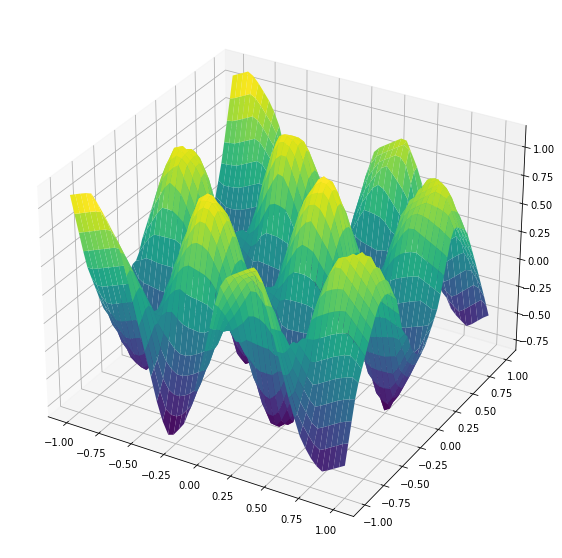

In [13]:
# plot prediction
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
Y_pred = activation3.output.reshape(m,m)
ax.plot_surface(X1, X2, Y_pred, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')